In [3]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model, VAR_m
from SIRD  import *
from exponential_regression import ExponentialRegression, MultiDimensionalExponentialRegression
from moving_average import MovingAverage, MovingAverageMulti
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model, evaluate_model_multi
import json
from useful_functions import plot_predictions


# import the data of new deaths  
df = pd.read_csv('deaths_and_infections.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

# import the data of hospitalized and infectious

df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])

# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)

# creating the data : 
data3D=np.array([new_deaths, n_infected, mobility_smoothed])

In [4]:
models1D=['Arima', 'Exponential Regression', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Reg','Bayesian Reg',  ]
models3D=[ 'VAR', 'Exp. Reg. Multi', 'Moving Average multi', 'SIRH multi 1', 'SIRH multi 2']

In the results file, we stored dictionaries of performance of models evaluated on test pandemics. Here we extract those dictionaries to vizualize their performance

In [5]:
# load results for WIS
WIS = False

if WIS: 
    loss_name='WIS'
    with open('./results/comparing_models1D_WIS_hospitalized_reach=7.json', 'r') as f:
        dicoresults1D_reach_7 = json.load(f)


    with open('./results/comparing_models3D_WIS_hospitalized_reach=7.json', 'r') as f:
        dicoresults3D_reach_7 = json.load(f)


    with open('./results/comparing_models1D_WIS_hospitalized_reach=14.json', 'r') as f:
        dicoresults1D_reach_14 = json.load(f)


    with open('./results/comparing_models3D_WIS_hospitalized_reach=14.json', 'r') as f:
        dicoresults3D_reach_14 = json.load(f)


# load results for rmse : 
RMSE = True
if RMSE:
    loss_name='RMSE'
    # load results:  
    with open('./results/comparing_models1D_WRMSE_hospitalized_reach=7.json', 'r') as f:
        dicoresults1D_reach_7 = json.load(f)


    with open('./results/comparing_models3D_RMSE_hospitalized_reach=7.json', 'r') as f:
        dicoresults3D_reach_7 = json.load(f)


    with open('./results/comparing_models1D_WRMSE_hospitalized_reach=14.json', 'r') as f:
        dicoresults1D_reach_14 = json.load(f)


    with open('./results/comparing_models3D_RMSE_hospitalized_reach=14.json', 'r') as f:
        dicoresults3D_reach_14 = json.load(f)

In [7]:
dicocolors={'Arima': 'red', 'Exponential Regression': 'blue', 'Moving Average': 'green', 'SIRD': 'gold', 'Moving Average multi': 'green', 'SIRD multi 1': 'gold', 'SIRD multi 2': 'orange', 'VAR': 'red', 'Exp. Reg. Multi': 'blue', 'SIRH1': 'gold', 'SIRH2': 'orange', 'SIRH3': 'purple', 'SIRH4': 'pink', 'SIRH multi 1': 'pink', 'SIRH multi 2': 'purple', 'Linear Reg': 'cyan',  'Bayesian Reg': 'lime', }

The next cell enables us to plot the best model at each point on the pandemic curve : 

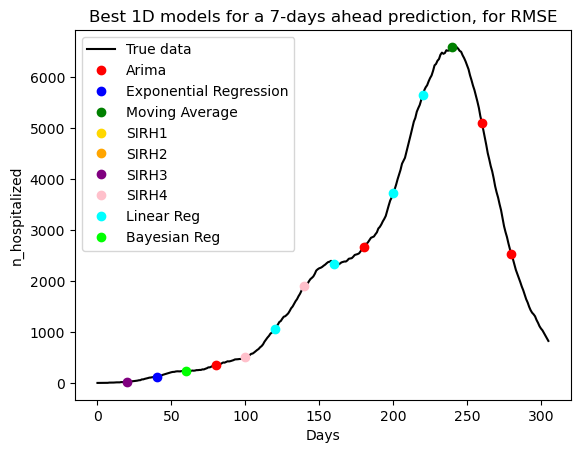

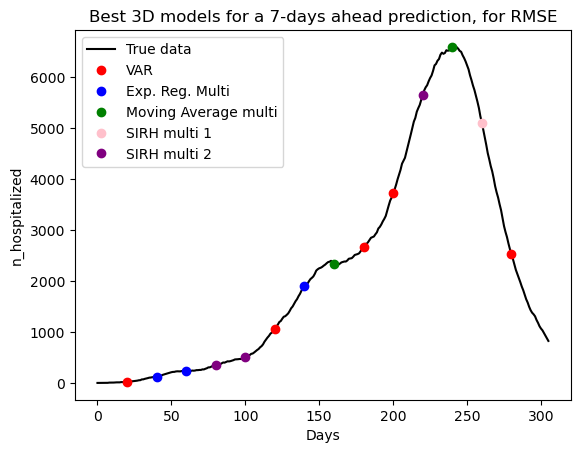

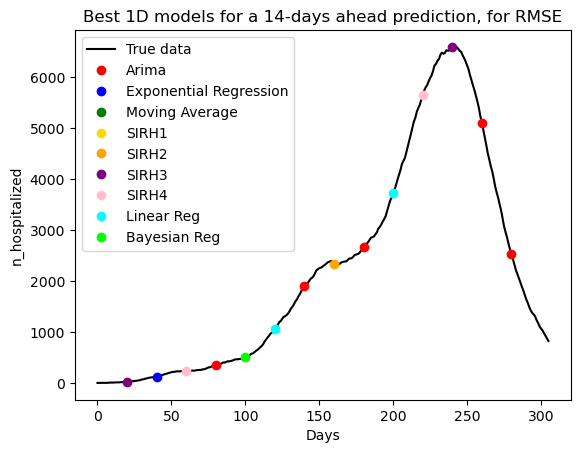

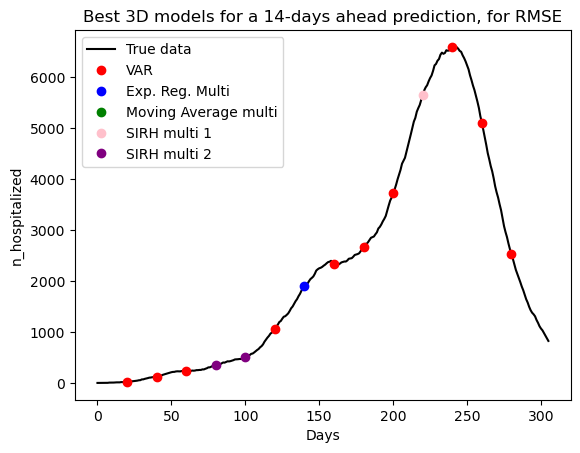

In [14]:
dico1Dreach7=dict()
for model in models1D: 
    dico1Dreach7[model]=[]

for point in dicoresults1D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach7[(models1D[np.argmin(dicoresults1D_reach_7[point])])].append(point_int)
    
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico1Dreach7.keys(): 
    plt.plot(dico1Dreach7[model], n_hospitalized[dico1Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 7-days ahead prediction, for ' + str(loss_name) )
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico3Dreach7=dict()
for model in models3D: 
    dico3Dreach7[model]=[]
for point in dicoresults3D_reach_7.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach7[(models3D[np.argmin(dicoresults3D_reach_7[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico3Dreach7.keys(): 
    plt.plot(dico3Dreach7[model], n_hospitalized[dico3Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 7-days ahead prediction, for ' + str(loss_name) )
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico1Dreach14=dict()
for model in models1D: 
    dico1Dreach14[model]=[]
for point in dicoresults1D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach14[(models1D[np.argmin(dicoresults1D_reach_14[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico1Dreach14.keys(): 
    plt.plot(dico1Dreach14[model], n_hospitalized[dico1Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 14-days ahead prediction, for ' + str(loss_name) )
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico3Dreach14=dict()
for model in models3D: 
    dico3Dreach14[model]=[]
for point in dicoresults3D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach14[(models3D[np.argmin(dicoresults3D_reach_14[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico3Dreach14.keys(): 
    plt.plot(dico3Dreach14[model], n_hospitalized[dico3Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 14-days ahead prediction, for ' + str(loss_name) )
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()




The next cell enables to compute the performance of the models 7 and 14 days ahead

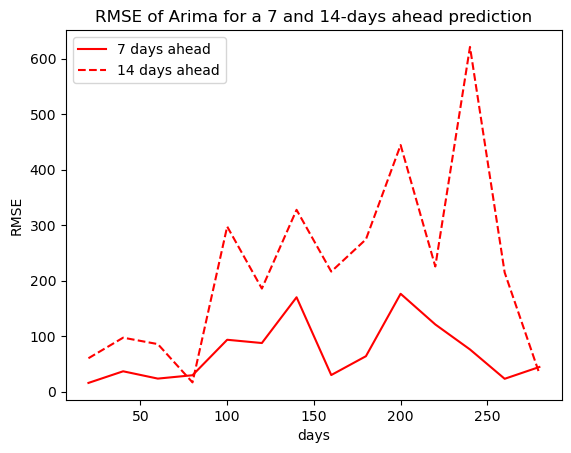

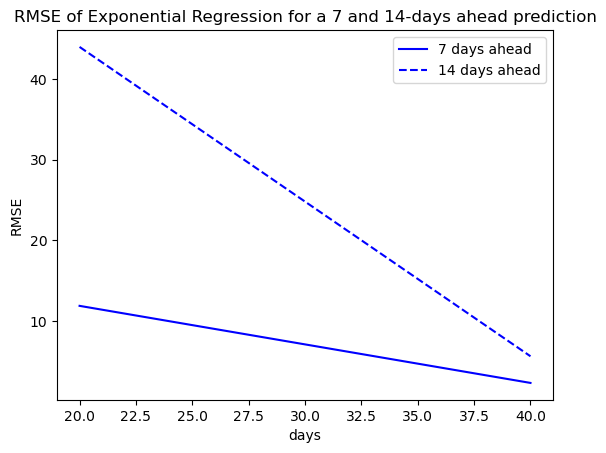

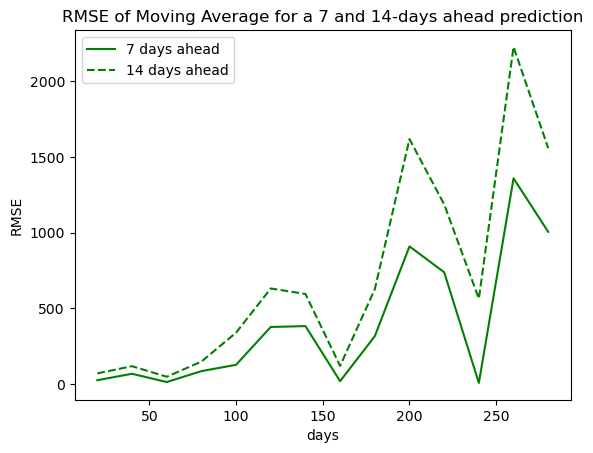

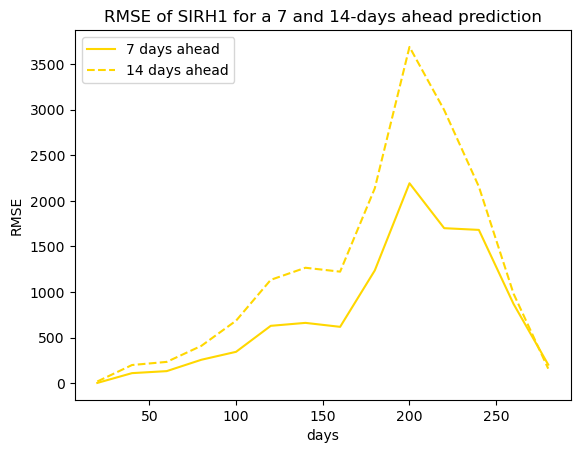

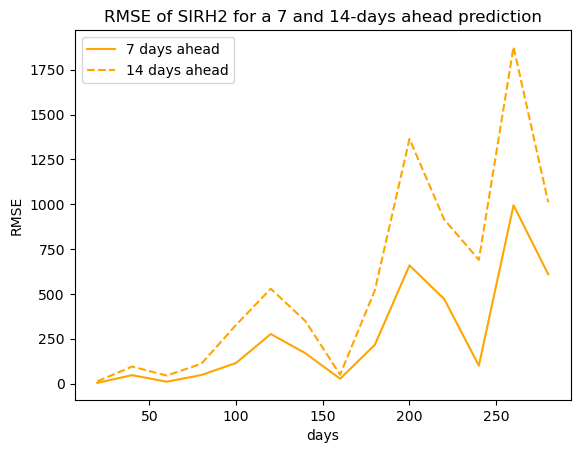

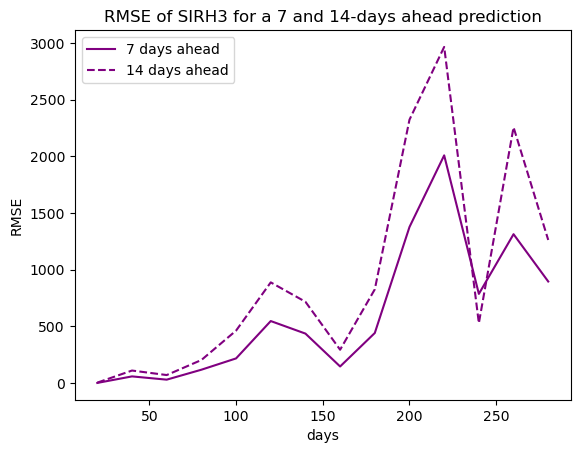

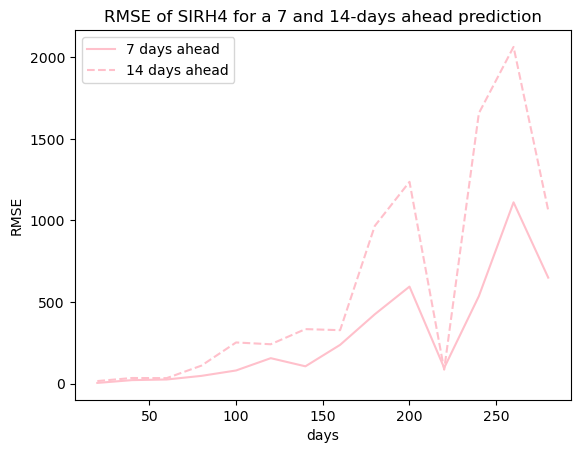

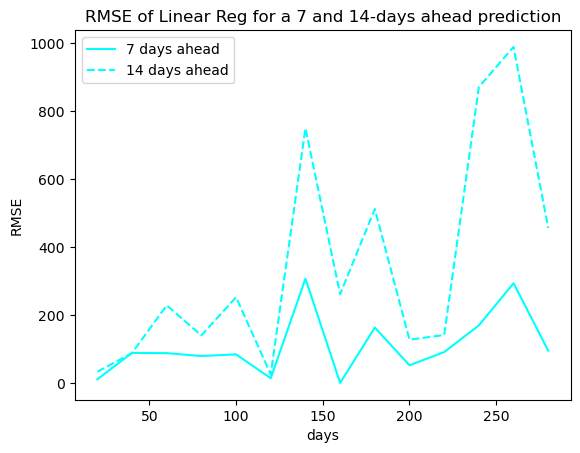

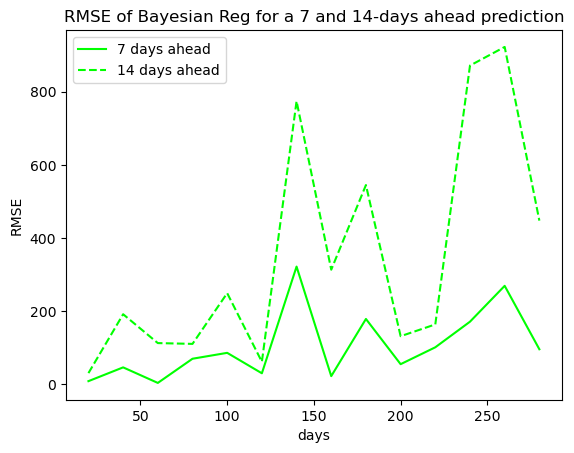

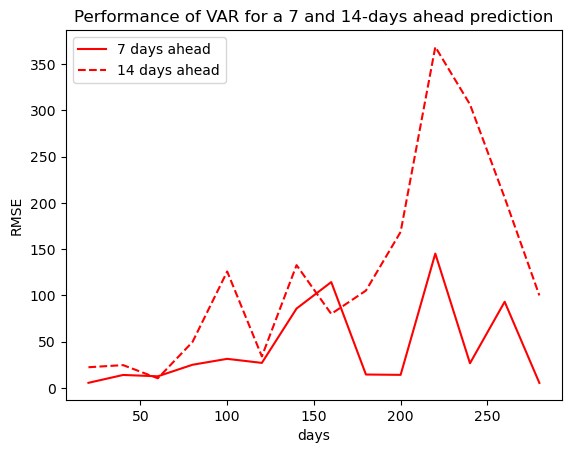

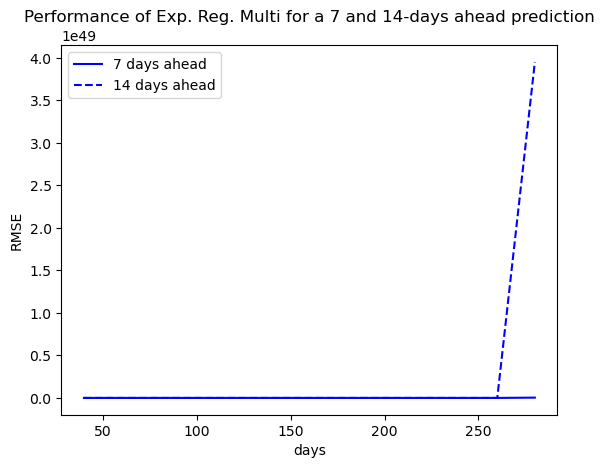

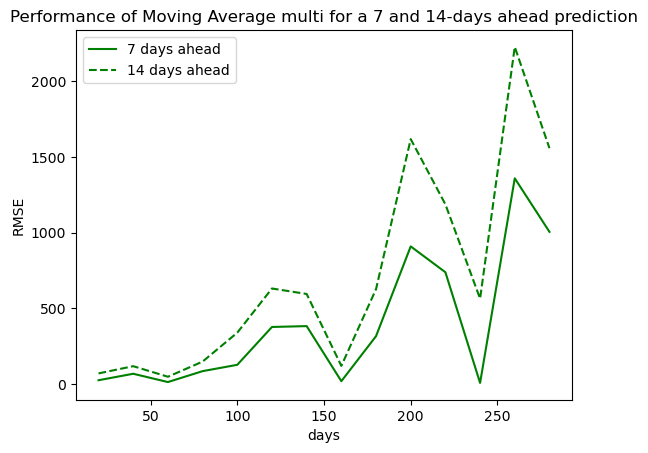

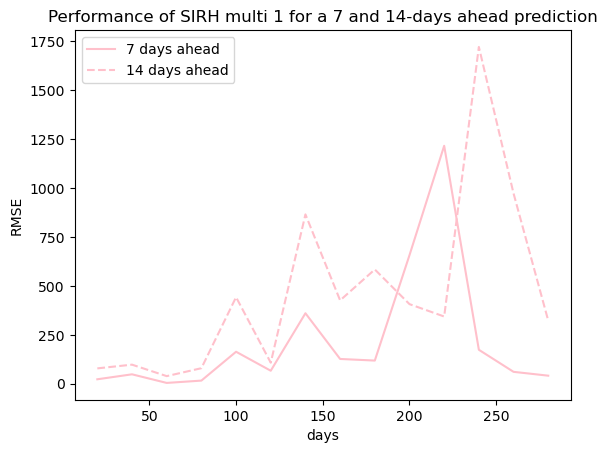

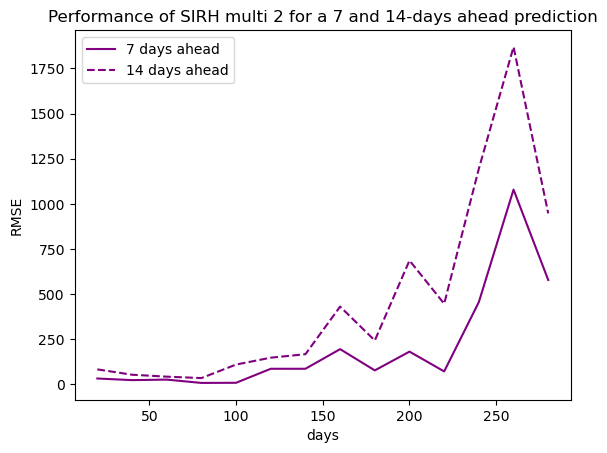

In [15]:
for model in models1D: 
    perfmodelreach7=[]
    perfmodelreach14=[]
    points=[]
    for point in dicoresults1D_reach_7.keys(): 
        point_int=(int(point.split('[')[1].split(']')[0]))
        points.append(point_int)
        perfmodelreach7.append(dicoresults1D_reach_7[point][models1D.index(model)])
        perfmodelreach14.append(dicoresults1D_reach_14[point][models1D.index(model)])
    plt.plot(points, perfmodelreach7, label='7 days ahead', c=dicocolors[model])
    plt.plot(points, perfmodelreach14, label='14 days ahead', c=dicocolors[model], linestyle='--')
    plt.title(str(loss_name) +' of ' + model + ' for a 7 and 14-days ahead prediction')
    plt.xlabel('days')
    plt.ylabel(loss_name)
    plt.legend()
    plt.show()


for model in models3D:
    perfmodelreach7=[]
    perfmodelreach14=[]
    points=[]
    for point in dicoresults3D_reach_7.keys(): 
        point_int=(int(point.split('[')[1].split(']')[0]))
        points.append(point_int)
        perfmodelreach7.append(dicoresults3D_reach_7[point][models3D.index(model)])
        perfmodelreach14.append(dicoresults3D_reach_14[point][models3D.index(model)])
    plt.plot(points, perfmodelreach7, label='7 days ahead', c=dicocolors[model])
    plt.plot(points, perfmodelreach14, label='14 days ahead', c=dicocolors[model], linestyle='--')
    plt.title('Performance of ' + model + ' for a 7 and 14-days ahead prediction')
    plt.xlabel('days')
    plt.ylabel(loss_name)
    plt.legend()
    plt.show()
        

The next cell enables us to compare the best performance of all 3D models versus all 1D models  

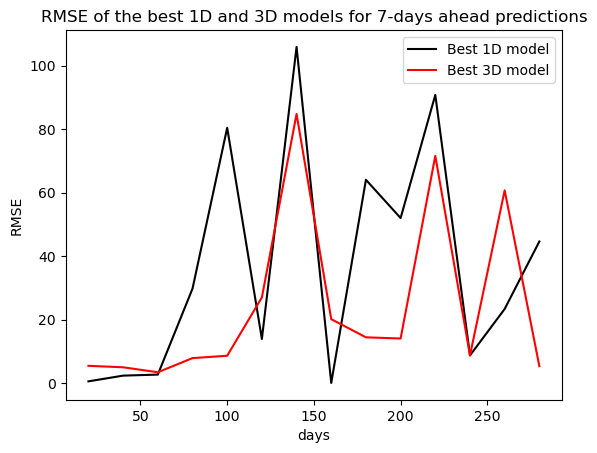

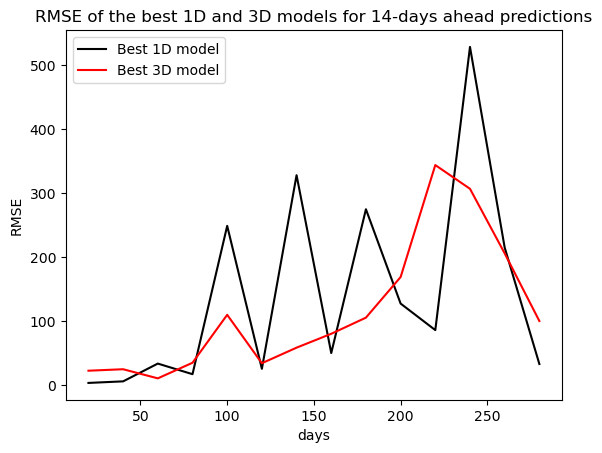

In [17]:
points=[]
best_perf_1D_7=[]
best_perf_3D_7=[]
for point in dicoresults1D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    index_best_model=np.argmin(dicoresults1D_reach_7[point])
    best_model=models1D[index_best_model]
    best_perf_1D_7.append(dicoresults1D_reach_7[point][index_best_model])
plt.plot(points, best_perf_1D_7, label='Best 1D model', c='black')
for point in dicoresults3D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    index_best_model=np.argmin(dicoresults3D_reach_7[point])
    best_model=models3D[index_best_model]
    best_perf_3D_7.append(dicoresults3D_reach_7[point][index_best_model])
plt.plot(points, best_perf_3D_7, label='Best 3D model', c='red')
plt.title(loss_name+ ' of the best 1D and 3D models for 7-days ahead predictions')
plt.xlabel('days')
plt.ylabel(loss_name)
plt.legend()
plt.show()


points=[]
best_perf_1D_14=[]
best_perf_3D_14=[]
for point in dicoresults1D_reach_14.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    index_best_model=np.argmin(dicoresults1D_reach_14[point])
    best_model=models1D[index_best_model]
    best_perf_1D_14.append(dicoresults1D_reach_14[point][index_best_model])
plt.plot(points, best_perf_1D_14, label='Best 1D model', c='black')
for point in dicoresults3D_reach_14.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    index_best_model=np.argmin(dicoresults3D_reach_14[point])
    best_model=models3D[index_best_model]
    best_perf_3D_14.append(dicoresults3D_reach_14[point][index_best_model])
plt.plot(points, best_perf_3D_14, label='Best 3D model', c='red')
plt.title(loss_name + ' of the best 1D and 3D models for 14-days ahead predictions')
plt.xlabel('days')
plt.ylabel(loss_name)
plt.legend()
plt.show()

